# Assignment 3
### Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/nhanes_data_17_18.csv')
df.head()

/tmp/ipykernel_25171/356483185.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
np.sum(df.isna(), axis = 0)

SEQN                                      0
GeneralHealthCondition                 2402
EverBreastfedOrFedBreastmilk           7297
AgeStoppedBreastfeedingdays            7504
AgeFirstFedFormuladays                 7289
                                       ... 
UnitOfMeasureDayweekmonthyear_2_SMQ    7870
CurrentSelfreportedHeightInches        2590
CurrentSelfreportedWeightPounds        2538
TriedToLoseWeightInPastYear            3279
TimesLost10LbsOrMoreToLoseWeight       2572
Length: 198, dtype: int64

In [3]:
x = df['GeneralHealthCondition']
x.value_counts()

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [4]:
print(f'Number of missings for general health: {x.isna().sum()} out of {df.shape[0]}')

Number of missings for general health: 2402 out of 8366


In [5]:
y = df['CoveredByHealthInsurance']
y.value_counts()

CoveredByHealthInsurance
1.0    7351
0.0     995
Name: count, dtype: int64

In [6]:
print(f'Number of missings for health insurance: {y.isna().sum()} out of {df.shape[0]}')

Number of missings for health insurance: 20 out of 8366


In [7]:
pd.crosstab(x,y)

CoveredByHealthInsurance,0.0,1.0
GeneralHealthCondition,,
Excellent,66,551
Fair or,210,959
Good,377,2071
Poor?,34,138
Very good,144,1398


In [8]:
pd.crosstab(x,y,normalize=0)

CoveredByHealthInsurance,0.0,1.0
GeneralHealthCondition,,
Excellent,0.106969,0.893031
Fair or,0.179641,0.820359
Good,0.154003,0.845997
Poor?,0.197674,0.802326
Very good,0.093385,0.906615


In [9]:
pd.crosstab(x,y,normalize=1)

CoveredByHealthInsurance,0.0,1.0
GeneralHealthCondition,,
Excellent,0.079422,0.107680
Fair or,0.252708,0.187415
Good,0.453670,0.404729
Poor?,0.040915,0.026969
Very good,0.173285,0.273207


I crosstabulated General Health with Covered by Health Insurance.

When controlling for health status and looking at insurance coverage,
- If you are in excellent health, you probably have health insurance (.11 versus .89)
- If you are in poor health, you are less likely to have health insurance (.2 versus .8)
- People with better health status seem more likely to be insured.

When controlling for insurance coverage and looking at general health,
- If you have insurance, you are more likely to be in the excellent (.08 versus .11) or very good (.17 versus .27) categories. 
- If you don't have insurance, you are more likely to be in the fair, good, or poor categories.
- Insured people seem to have better health status.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/nhanes_data_17_18.csv')
df.head()

/tmp/ipykernel_25171/356483185.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
x = df['GeneralHealthCondition']
x.value_counts()

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [12]:
y = df['TotalCholesterolMgdl']
y.value_counts

<bound method IndexOpsMixin.value_counts of 0         NaN
1         NaN
2       157.0
3       148.0
4       189.0
        ...  
8361    119.0
8362    182.0
8363    172.0
8364    150.0
8365    163.0
Name: TotalCholesterolMgdl, Length: 8366, dtype: float64>

<Axes: xlabel='TotalCholesterolMgdl', ylabel='Density'>

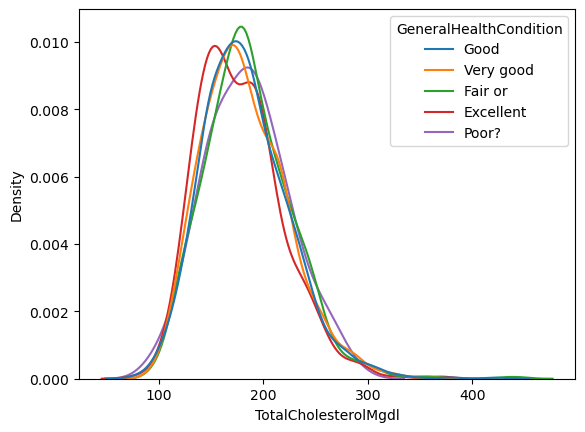

In [13]:
sns.kdeplot(x=y,hue=x,common_norm=False)

In [14]:
gdf = df.loc[:,['GeneralHealthCondition','TotalCholesterolMgdl']]
gdf.groupby('GeneralHealthCondition').describe()

TotalCholesterolMgdl                               \
                                      count        mean        std   min   
GeneralHealthCondition                                                     
Excellent                             564.0  177.260638  39.993443  79.0   
Fair or                              1111.0  185.615662  41.810608  94.0   
Good                                 2302.0  182.909209  41.762974  76.0   
Poor?                                 156.0  184.371795  39.929328  92.0   
Very good                            1441.0  182.217210  41.161833  91.0   

                                                      
                           25%    50%     75%    max  
GeneralHealthCondition                                
Excellent               148.00  172.5  201.00  370.0  
Fair or                 157.50  181.0  211.00  446.0  
Good                    153.00  179.0  208.00  428.0  
Poor?                   156.25  183.0  210.25  291.0  
Very good               152.00  178.0  209.00  366.0

My understanding is that cholesterol is bad for your health. At the mean, however, the different groups seems to have fairly similar cholesterol levels. People in excellent health have a lower value at 177 than everyone else, who seems to be in the low- to mid- 180s. Likewise, the standard deviation is rather large: In the low 40s. Likewise, the kernel density plots of cholesterol by reported health time overlap almost totally. This suggests that choleterol is not a very powerful predictor of self-report health condition. It might be medically significant, but these plots and tables don't suggest it plays a big role in perceptions of health.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

Let's take a derivative with respect to the prediction:
\begin{alignat*}{2}
MSE'(\hat{y}(z)) & =& \dfrac{-2}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right)\\
& =& \dfrac{-2}{N} \sum_{i=1}^N y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right) + \dfrac{2}{N} \sum_{i=1}^N \hat{y}(z) \frac{1}{h}k\left(\frac{z-x_i}{h}\right)\\
\end{alignat*}
Setting this equal to zero and solving for $\hat{y}(z)$ yields
\begin{alignat*}{2}
0 & =&  \dfrac{-2}{N} \sum_{i=1}^N y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right) + \dfrac{2}{N} \sum_{i=1}^N \hat{y}(z) \frac{1}{h}k\left(\frac{z-x_i}{h}\right)\\
 \dfrac{1}{N} \sum_{i=1}^N y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right) &=& \hat{y}(z) \dfrac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right) \\
\hat{y}(z)  &=& \dfrac{\frac{1}{N} \sum_{i=1}^N y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\frac{1}{N} \sum_{i=1}^N  \frac{1}{h}k\left(\frac{z-x_i}{h}\right)} \\
\end{alignat*}
which is LCLS.

So if we minimize a particular kind of mean squared error that uses local smoothing to score error, we naturally derive LCLS.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [15]:
df = pd.read_csv('./data/ames_prices.csv')
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


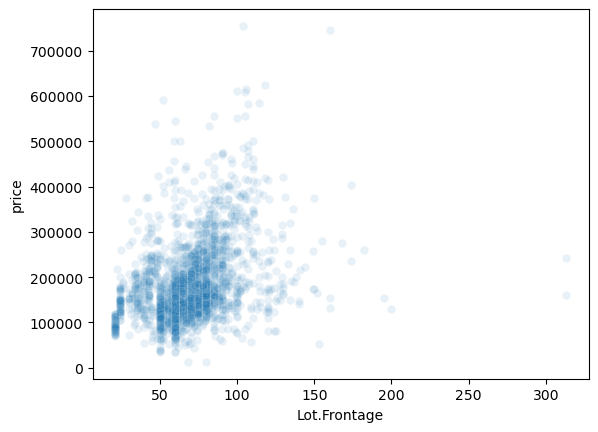

In [16]:
## Grab two numeric variables
df = df.loc[:,['price', 'Lot.Frontage']] # Filter on the columns we'll use
df = df.dropna() # Drop missing values
df = df.reset_index() # Reset the row index; I hate pandas
y = df['price']
x = df['Lot.Frontage']

sns.scatterplot(y=y,x=x,alpha = .1)
plt.show()

## A procedural approach to LCLS, without classes or NumPy:

/tmp/ipykernel_25171/1908465332.py:27: RuntimeWarning: invalid value encountered in scalar divide
  y_hat_z = num/den # Compute y_hat(z)


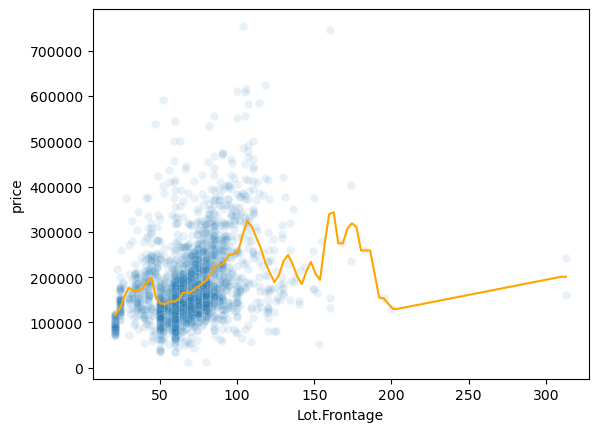

In [17]:
## Create a grid of "x" values:
grid = np.linspace( x.min(), x.max(), 100)

## Number of observations:
N = len(x)

## Bandwidth:
h = 1.06 * np.std(x) * N**(-0.2)

## Kernel function:
def kernel(u):
    '''Epanechnikov, for variety.'''
    k = .75 * (1-u**2) * int( np.abs(u) <= 1)
    return k

# %%

# LCLS Regression:
cef = [] # Save values for the CEF
for z in grid: # For each grid value
    num = 0 # Start with the numerator sum = 0
    den = 0 # Start with the denominator sum = 0
    for i, data in enumerate(x): # For each data point
        k_data = kernel( (z-data)/h )/(N*h) # Compute kernel weight
        den += k_data # Add to denominator
        num += y[i] * k_data # Multiple by y value, add to numerator
    y_hat_z = num/den # Compute y_hat(z)
    cef.append(y_hat_z) # Add to the CEF


sns.scatterplot(y=y,x=x,alpha = .1)
sns.lineplot(x=grid,y=cef,color='orange')
plt.show()

## Wrapping it into a function

In [18]:
def lcls(x, y, h=None, kernel_type='epanechnikov', plot=True, steps=50):
    ''' Perform local constant least squares regression. '''

    n = len(x) # Number of observations:

    ## Bandwidth selection:
    if h is None:
        h = 1.06 * np.std(x) * n**(-0.2)

    ## Kernel selection:
    if kernel_type == 'epanechnikov':
        def kernel(u):        
            return .75 * (1-u**2) * int( np.abs(u) <= 1)
    elif kernel_type == 'gaussian':
        def kernel(u):
            return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)
    elif kernel_type == 'triangular':
        def kernel(u):
            return (1 - np.abs(u)) * (np.abs(u) <= 1)
    elif kernel_type == 'uniform':
        def kernel(u):
            return 0.5 * (np.abs(u) <= 1)
    else: 
        print('Kernel type unsupported.')

    ## LCLS Regression:
    grid = np.linspace( x.min(), x.max(), steps) # Grid of values
    cef = [] # Save values for the CEF
    for z in grid: # For each grid value
        num = 0 # Start with the numerator sum = 0
        den = 0 # Start with the denominator sum = 0
        for i, data in enumerate(x): # For each data point
            k_data = kernel( (z-data)/h )/(N*h) # Compute kernel weight
            den += k_data # Add to denominator
            num += y[i] * k_data # Multiple by y value, add to numerator
        y_hat_z = num/den # Compute y_hat(z)
        cef.append(y_hat_z) # Add to the CEF
    cef = np.array(cef) # Make the CEF a numpy array

    ## Plot:
    if plot:
        sns.scatterplot(y=y,x=x,alpha = .1)
        sns.lineplot(x=grid,y=cef,color='orange')
        plt.show()

    return cef

/tmp/ipykernel_25171/1836239669.py:36: RuntimeWarning: invalid value encountered in scalar divide
  y_hat_z = num/den # Compute y_hat(z)


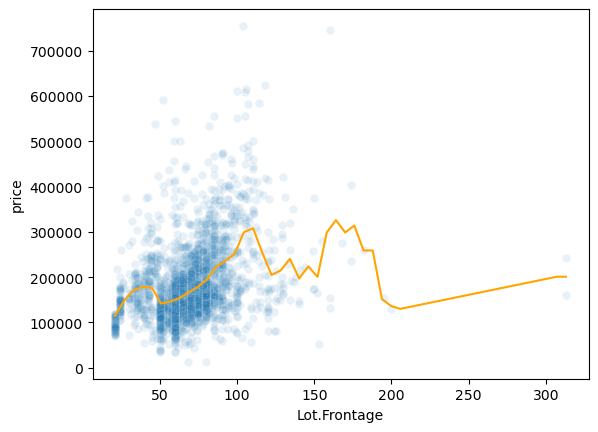

array([114885.5258467 , 148879.13466581, 171205.24576181, 178575.57464422,
       176587.37102685, 141664.17969993, 146182.2456104 , 153995.82153999,
       166438.72497967, 178920.30975212, 195068.92680781, 223672.52907193,
       236182.34693144, 251757.07761572, 299408.83373913, 307985.70660198,
       254020.47053353, 204988.94001757, 214932.61079804, 240562.24733825,
       197139.50448076, 223808.82352941, 200617.35294118, 298579.86270872,
       326056.45733788, 298755.29739777, 313907.74907749, 259000.        ,
       259000.        , 151923.07692308, 136179.138322  , 130000.        ,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
       201000.        , 201000.        ])

In [19]:
lcls(x,y,kernel_type='triangular',h=7)

## A class-based approach, using NumPy

In [20]:
class lcls:
    ''' Local constant least squares estimator class.'''

    def __init__(self):
        self.h = None
        self.kernel = None
        self.n = None
        self.x = None
        self.y = None
        self.density_x = None
        self.y_hat = None
        self.grid = None

    def kernel_function(self, u):
        ''' Kernel options for lcls.'''
        if self.kernel == 'gaussian':
            return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)
        elif self.kernel == 'uniform':
            return 0.5 * (np.abs(u) <= 1)
        elif self.kernel == 'triangular':
            return (1 - np.abs(u)) * (np.abs(u) <= 1)
        elif self.kernel == 'epanechnikov':
            return .75 * (1-u**2) * (np.abs(u) <= 1)
        else:
            print("Unsupported kernel.")

    def fit(self, x, y, h = None, kernel_type = None):
        '''Fit the LCLS estimator; automatically selects Silverman bandwidth.'''
        self.x = np.asarray(x)
        self.y = np.asarray(y)
        self.n = len(self.x)

        if kernel_type is None:
            self.kernel = 'gaussian'
        else:
            self.kernel = kernel_type

        if h is None:
            self.h = 1.06 * np.sqrt( np.var(self.x) ) * self.n**(-0.2)
        else:
            self.h = h

        self.grid = np.sort( np.unique(self.x) )

        # Compute KDE
        diff_mat = (self.grid.reshape(1, -1) - self.x.reshape(-1, 1)) / self.h
        kernel_vals = self.kernel_function(diff_mat)/self.h
        self.density = np.mean(kernel_vals, axis=0) 

        # Compute LCLS
        den = self.density 
        num = self.y @ kernel_vals/self.n # Use matrix multiplication
        self.y_hat = num/den

    def plot(self):
        '''Plot LCLS estimator.'''
        sns.scatterplot(x=self.x, y=self.y, alpha=.05)
        plt.plot(self.grid, self.y_hat, color='orange')
        plt.title(f"LCLS with {self.kernel} kernel, h={self.h:.4f}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

    def __repr__(self):
        self.plot()
        return (f"LCLS Summary:\n"
                f"Kernel: {self.kernel}\n"
                f"Bandwidth: {self.h:.4f}\n")

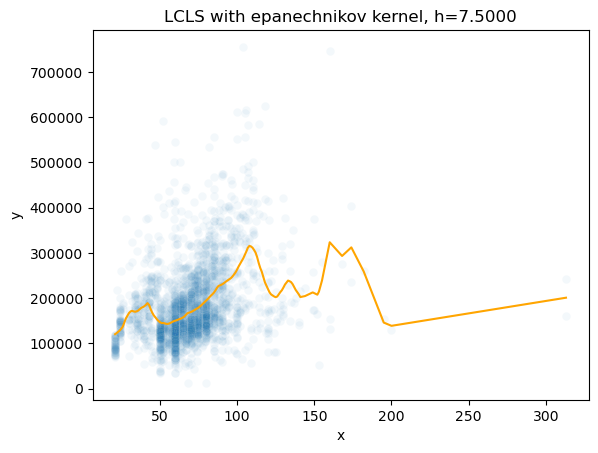

LCLS Summary:
Kernel: epanechnikov
Bandwidth: 7.5000

In [21]:
reg = lcls()
reg.fit(x,y,kernel_type='epanechnikov',h=7.5)
reg

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/nhanes_data_17_18.csv')
df.head()

/tmp/ipykernel_25171/356483185.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
x = df['EverUsedMarijuanaOrHashish']
y = df['FeelingDownDepressedOrHopeless']

pd.crosstab(x,y,normalize=0)

FeelingDownDepressedOrHopeless,0.0,1.0,2.0,3.0
EverUsedMarijuanaOrHashish,,,,
0.0,0.815880,0.138946,0.031485,0.013689
1.0,0.695627,0.206559,0.055236,0.042578


array([[145.51743642,          nan],
       [         nan,          nan]])

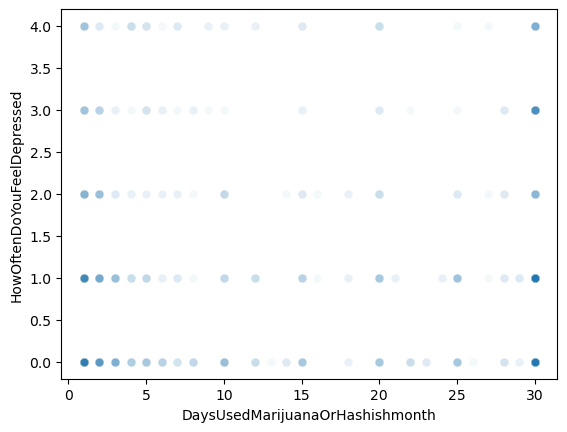

In [24]:
yc = df['HowOftenDoYouFeelDepressed']
xc = df['DaysUsedMarijuanaOrHashishmonth']

mask = xc<32
yc = yc[mask]
xc = xc[mask]

sns.scatterplot(x=xc,y=yc,alpha=.05)

np.cov(xc,yc)

I personally find obersvational studies that argue that people who use drugs like cannabis to be more likely to be depressed or suffer mental illness to be irresponsible. It's possible that recreational drug use causes depression or mental illness. But equally likely is that people who suffer from mental illness or depression seek out substances that alleviate the symptoms. It would be particularly cruel to punish people seeking to self-medicate.

In the cross tabs, people who use cannabis are more likely to have higher self-reported levels of depression. In the scatterplot, people who use cannabis 30 days a month score higher on depression scores than those who don't.

It's tempting to say that cannabis then causes depression. But the kind of person who uses recreational drugs 30 days a month is systematically different from those who use cannabis zero days per month. The depression might, instead, be driving the cannabis use.

These kinds of causal questions are difficult to untangle, and require some kind of randomized variation to credibly detect the impact of something like recreational drug use.